# Gridworld

## Figure 3.2

Define states as coordinates of cells in 5x5 table

In [11]:
states = [(x, y) for x in range(5) for y in range(5)]

Actions are moving to north, south, east and west

In [12]:
actions = {'north': (0, -1), 'south': (0, 1), 'east': (1, 0), 'west': (-1, 0)}

Initial values as dictionary with keys being the states

In [13]:
values = dict((state, 0) for state in states)

Function for state transitions

In [14]:
def state_reward(state, action):
    x, y = state
    dx, dy = action
    # A -> A'
    if (x, y) == (0, 1):
        return (4, 1), 10
    # B -> B'
    if (x, y) == (0, 3):
        return (2, 3), 5

    # new state
    x1, y1 = x + dx, y + dy

    # out of bounds
    if x1 in (-1, 5) or y1 in (-1, 5):
        return (x, y), -1
    else:
        return (x1, y1), 0

Function for updating values

In [15]:
def update_value(state, discount=0.9):
    _value = 0
    for action in actions.values():
        next_state, reward = state_reward(state, action)
        _value += policy * (reward + discount * values[next_state])
    values[state] = _value

Iterative policy evaluation

In [16]:
policy = 0.25

theta = 1e-6
delta = 1e-5
while delta > theta:
    delta = 0
    for state in states:
        prev_value = values[state]
        update_value(state)
        delta = max(delta, abs(prev_value - values[state]))

Draw table with values estimations

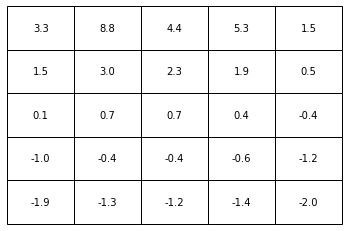

In [17]:
import matplotlib.pyplot as plt
from matplotlib.table import Table


def fill_table(values):
    fig, ax = plt.subplots()
    tb = Table(ax, bbox=[0, 0, 1, 1])
    for (x, y), val in values.items():
        tb.add_cell(x, y, 1/5, 1/5, text=round(val, 1), 
                    loc='center', facecolor='white')

    ax.add_table(tb)
    ax.set_axis_off()


fill_table()

## Figure 3.5

Function for updating optimal values

In [18]:
def update_value_optimal(state, discount=0.9):
    _value = []
    for action in actions.values():
        next_state, reward = state_reward(state, action)
        _value.append(reward + discount * values[next_state])
    values[state] = max(_value)

Optimal value calculation

In [19]:
theta = 1e-6
delta = 1e-5
while delta > theta:
    delta = 0
    for state in states:
        prev_value = values[state]
        update_value_optimal(state)
        delta = max(delta, abs(prev_value - values[state]))

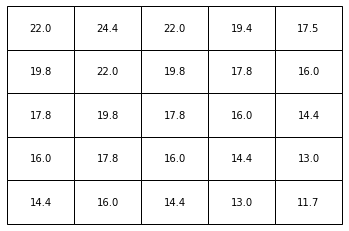

In [20]:
fill_table()
plt.savefig('figs/fig3_5.svg', format='svg')